In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('US_Accidents_June20.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
df

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,
A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.columns

Index(['Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df_update=df.drop(['TMC','Severity','End_Time','Distance(mi)','End_Lat','End_Lng','Description', 'Number', 'Street', 'Side', 'City', 'County', 'Zipcode', 'Country', 'Timezone', 'Airport_Code','Weather_Timestamp', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)','Wind_Direction','Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight','Amenity', 'Bump', 'Crossing','Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station','Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop','Start_Lat','Start_Lng','Weather_Condition','Sunrise_Sunset'], axis=1, inplace=True)
df

,Source,Start_Time,State,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in)
ID,,,,,,,
A-1,MapQuest,2016-02-08 05:46:00,OH,36.9,10.0,NaN,0.02
A-2,MapQuest,2016-02-08 06:07:59,OH,37.9,10.0,NaN,0.00
A-3,MapQuest,2016-02-08 06:49:27,OH,36.0,10.0,3.5,NaN
A-4,MapQuest,2016-02-08 07:23:34,OH,35.1,9.0,4.6,NaN
A-5,MapQuest,2016-02-08 07:39:07,OH,36.0,6.0,3.5,NaN
...,...,...,...,...,...,...,...
A-3513776,Bing,2019-08-23 18:03:25,CA,86.0,10.0,13.0,0.00
A-3513777,Bing,2019-08-23 19:11:30,CA,70.0,10.0,6.0,0.00
A-3513778,Bing,2019-08-23 19:00:21,CA,73.0,10.0,10.0,0.00


In [5]:
df.dtypes

Source                object
Start_Time            object
State                 object
Temperature(F)       float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
dtype: object

In [6]:
df_y=pd.DataFrame(df.State.value_counts())
df_y.columns=['Number_of_Accidents']
df_y.head()

,Number_of_Accidents
CA,816825
TX,329284
FL,258002
SC,173277
NC,165958


In [7]:
df_x=df.groupby(['State']).mean()
df_x.rename(columns = {'Precipitation(in)':'Precipitation'}, inplace = True) 
df_x.rename(columns = {'Visibility(mi)':'Visibility'}, inplace = True)
df_x.rename(columns = {'Wind_Speed(mph)':'Wind_Speed'}, inplace = True)
df_x.rename(columns = {'Temperature(F)':'Temperature'}, inplace = True)
df_x.head()

,Temperature,Visibility,Wind_Speed,Precipitation
State,,,,
AL,66.919484,9.066483,7.052118,0.018544
AR,62.531729,8.695276,7.696604,0.022364
AZ,75.710751,10.695044,7.477325,0.002039
CA,64.972313,9.150125,7.202030,0.007165
CO,48.828709,12.974035,8.733020,0.002090


In [8]:
df_y=df_y.reindex(df_x.index)
df_y.head()

,Number_of_Accidents
State,
AL,44625
AR,2012
AZ,78584
CA,816825
CO,49731


In [9]:
df_x['Number_of_Accidents']=df_y.Number_of_Accidents
df_x.fillna(0, inplace=True)
df_x.head()

,Temperature,Visibility,Wind_Speed,Precipitation,Number_of_Accidents
State,,,,,
AL,66.919484,9.066483,7.052118,0.018544,44625
AR,62.531729,8.695276,7.696604,0.022364,2012
AZ,75.710751,10.695044,7.477325,0.002039,78584
CA,64.972313,9.150125,7.202030,0.007165,816825
CO,48.828709,12.974035,8.733020,0.002090,49731


In [10]:
#Create the training and testing data sets.
mask = np.random.rand(len(df_x)) < 0.8
df_train = df_x[mask]
df_test = df_x[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=41
Testing data set length=8


In [11]:
#Setup the regression expression in patsy notation. We are telling patsy that Number_of_Accidents is our dependent variable and
# it depends on the regression variables
expr = """Number_of_Accidents ~ Temperature  + Visibility + Wind_Speed + Precipitation"""
print(expr)

Number_of_Accidents ~ Temperature  + Visibility + Wind_Speed + Precipitation


In [12]:
#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [13]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     Number_of_Accidents   No. Observations:                   41
Model:                             GLM   Df Residuals:                       36
Model Family:                  Poisson   Df Model:                            4
Link Function:                     log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:            -1.9840e+06
Date:                 Thu, 06 Aug 2020   Deviance:                   3.9675e+06
Time:                         20:10:30   Pearson chi2:                 5.62e+06
No. Iterations:                      6                                         
Covariance Type:             nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.5837      0.011 

In [14]:
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[154629.0839709  104603.50786296 234083.78136046 149020.67182474
  18268.60171218  48260.96170334  75577.85348653  56726.10849802
 130402.93916515  25532.37944392  42931.01296772  38044.79384693
  53294.15027654  71082.28740717 176218.05244688  37982.14164964
  45628.77472652  35843.17604483  20189.55779876  54208.76309985
 113700.54501982  15951.11523857 118759.0521938   17298.09040626
  42758.76187495  42565.04087644  41074.3460894   63300.80796001
  79368.2090229   22160.18790172  57998.89065278  65507.41565564
  38626.54985026 153099.6988594  102706.6598366  149614.16211192
  82770.62433547  43563.63020167  66651.1998814   29663.1153623
  65901.29737543]
41


In [15]:
df_train['Number_of_Accidents_LAMBDA'] = poisson_training_results.mu

C:\Users\rams\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['Number_of_Accidents'] - x['Number_of_Accidents_LAMBDA'])**2 - x['Number_of_Accidents']) / x['Number_of_Accidents_LAMBDA'], axis=1)

C:\Users\rams\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
ols_expr = """AUX_OLS_DEP ~ Number_of_Accidents_LAMBDA - 1"""

In [18]:
aux_olsr_results = smf.ols(ols_expr, df_train).fit()

In [19]:
print(aux_olsr_results.params)

Number_of_Accidents_LAMBDA    1.943483
dtype: float64


In [20]:
aux_olsr_results.tvalues

Number_of_Accidents_LAMBDA    2.357332
dtype: float64

In [21]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [22]:
print(nb2_training_results.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     Number_of_Accidents   No. Observations:                   41
Model:                             GLM   Df Residuals:                       36
Model Family:         NegativeBinomial   Df Model:                            4
Link Function:                     log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -487.91
Date:                 Thu, 06 Aug 2020   Deviance:                       41.538
Time:                         20:10:30   Pearson chi2:                     40.2
No. Iterations:                    100                                         
Covariance Type:             nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4155      3.438 

In [23]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [24]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

                mean        mean_se  mean_ci_lower  mean_ci_upper
State                                                            
FL     218428.226652  125719.138613   70695.033791  674883.193907
KS      52726.344916   18884.616420   26131.173929  106388.922893
MD      70067.772805   23243.657260   36571.966577  134241.968517
OH      43974.049019   11322.593320   26547.649740   72839.479430
OR      51801.442101   20081.766677   24230.265038  110745.359144
SD      11501.428693   10916.177997    1790.043873   73899.228959
UT      41823.382805   13784.419910   21921.722173   79792.788883
WY       8522.506696    8332.596300    1254.103758   57916.356517


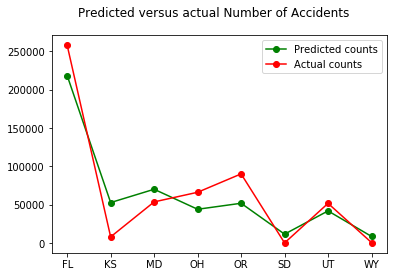

In [30]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Number_of_Accidents']
fig = plt.figure()
fig.suptitle('Predicted versus actual Number of Accidents')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts' );
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

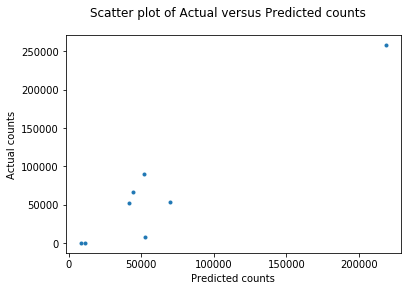

In [26]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()